In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

73.89128911510747 18.007415097878464
67.41646730681086 87.70902973048544
86.70078326219814 16.62929075175589
54.56059814368365 -125.74899622243561
-53.31969648453449 -42.87533288061158
-19.30806752316839 23.928321404964976
-42.85711487985816 98.71206626356269
79.00385800762632 68.10334687077975
13.065994075795558 138.69945105751378
-63.28936147411445 -136.61262865931909
-21.814455180562845 173.30528274806073
-68.07483884053316 110.55842132437942
-51.4067048611602 5.282590755470011
-48.6664718196736 -3.287367273900486
-40.350359555337974 -67.48572155901743
26.76577947701712 95.90043823846497
61.356775465738394 49.221097269352896
48.75671505638428 179.7359037757339
-53.487028764960115 -6.57681139760237
80.25137937820514 40.109037613273074
-42.33368438525022 -16.25491716334932
23.419442416834457 -5.7516882655461075
-76.92279752938111 -8.811312403187515
75.96034516347731 17.085605852150508
83.6602789200476 16.32851674474665
6.447801590429506 -31.586932706035327
17.958436123511703 48.231976

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [6]:
#Import citipy
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create counters.
record_count = 1
set_count = 1
city_data = []
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(7)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | tromso
Processing Record 2 of Set 1 | snezhnogorsk
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | burns lake
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | maun
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | airai
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | isangel
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | general roca
Processing Record 15 of Set 1 | khonsa
Processing Record 16 of Set 1 | urdoma
Processing Record 17 of Set 1 | beringovskiy
Processing Record 18 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | taoudenni
Processing Record 21 of Set 1 | sao filipe
Processing Record 22 of Set 1 | najran
Processing Record 23 of Set 1 | bluff
Proc

Processing Record 36 of Set 4 | san jose
Processing Record 37 of Set 4 | mount isa
Processing Record 38 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 39 of Set 4 | chernyshevskiy
Processing Record 40 of Set 4 | qaanaaq
Processing Record 41 of Set 4 | sambava
Processing Record 42 of Set 4 | harper
Processing Record 43 of Set 4 | juneau
Processing Record 44 of Set 4 | mega
Processing Record 45 of Set 4 | jalu
Processing Record 46 of Set 4 | kulhudhuffushi
Processing Record 47 of Set 4 | booue
Processing Record 48 of Set 4 | ponta do sol
Processing Record 49 of Set 4 | hachinohe
Processing Record 50 of Set 4 | christchurch
Processing Record 1 of Set 5 | kurayoshi
Processing Record 2 of Set 5 | charters towers
Processing Record 3 of Set 5 | osoyoos
Processing Record 4 of Set 5 | khatanga
Processing Record 5 of Set 5 | pevek
Processing Record 6 of Set 5 | east london
Processing Record 7 of Set 5 | iskateley
Processing Record 8 of Set 5 | katherine
Processing Record 9 

Processing Record 27 of Set 8 | batemans bay
Processing Record 28 of Set 8 | luanda
Processing Record 29 of Set 8 | mantua
Processing Record 30 of Set 8 | nalvo
Processing Record 31 of Set 8 | bibiani
Processing Record 32 of Set 8 | kristiansund
Processing Record 33 of Set 8 | zhaotong
Processing Record 34 of Set 8 | pochutla
Processing Record 35 of Set 8 | barranca
Processing Record 36 of Set 8 | bantogon
Processing Record 37 of Set 8 | robe
Processing Record 38 of Set 8 | coquimbo
Processing Record 39 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 40 of Set 8 | ancud
Processing Record 41 of Set 8 | dubbo
Processing Record 42 of Set 8 | clarence town
Processing Record 43 of Set 8 | braniewo
Processing Record 44 of Set 8 | gardelegen
Processing Record 45 of Set 8 | marystown
Processing Record 46 of Set 8 | leh
Processing Record 47 of Set 8 | itarema
Processing Record 48 of Set 8 | praia da vitoria
Processing Record 49 of Set 8 | tasiilaq
Processing Record 50 of Set 

Processing Record 15 of Set 12 | bardiyah
Processing Record 16 of Set 12 | adra
Processing Record 17 of Set 12 | kamiiso
Processing Record 18 of Set 12 | umm jarr
City not found. Skipping...
Processing Record 19 of Set 12 | banda aceh
Processing Record 20 of Set 12 | pantai remis
Processing Record 21 of Set 12 | guerrero negro
Processing Record 22 of Set 12 | burgeo
Processing Record 23 of Set 12 | lubu
Processing Record 24 of Set 12 | orlik
Processing Record 25 of Set 12 | esmeralda
Processing Record 26 of Set 12 | vyazemskiy
Processing Record 27 of Set 12 | banikoara
Processing Record 28 of Set 12 | nadym
Processing Record 29 of Set 12 | chimbote
Processing Record 30 of Set 12 | morlaix
Processing Record 31 of Set 12 | rockingham
Processing Record 32 of Set 12 | charthawal
Processing Record 33 of Set 12 | kadhan
Processing Record 34 of Set 12 | marondera
Processing Record 35 of Set 12 | kichera
Processing Record 36 of Set 12 | kudahuvadhoo
Processing Record 37 of Set 12 | guajara-mir

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_raw_df = pd.DataFrame(city_data)
city_data_raw_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tromso,69.6496,18.9570,57.22,67,40,11.50,NO,2022-07-19 18:00:41
1,Snezhnogorsk,69.1933,33.2531,64.18,71,100,12.21,RU,2022-07-19 18:00:41
2,Longyearbyen,78.2186,15.6401,51.64,82,40,3.44,SJ,2022-07-19 18:00:41
3,Burns Lake,54.2331,-125.7533,63.36,45,40,10.49,CA,2022-07-19 18:00:06
4,Mar Del Plata,-38.0023,-57.5575,55.94,53,0,18.99,AR,2022-07-19 18:00:42
5,Maun,-19.9833,23.4167,56.34,52,14,6.80,BW,2022-07-19 18:00:42
6,Busselton,-33.6500,115.3333,57.13,78,100,9.28,AU,2022-07-19 17:57:08
7,Airai,-8.9266,125.4092,53.11,84,58,3.20,TL,2022-07-19 18:00:43
8,Rikitea,-23.1203,-134.9692,74.01,71,1,10.02,PF,2022-07-19 18:00:43
9,Isangel,-19.5500,169.2667,75.16,90,23,9.22,VU,2022-07-19 18:00:43


In [11]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_raw_df[new_column_order]
#city_data_df

In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
#today

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

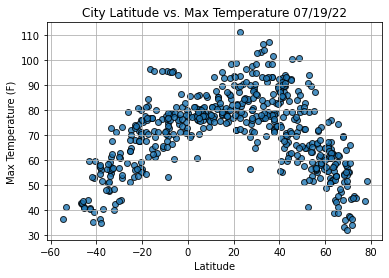

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

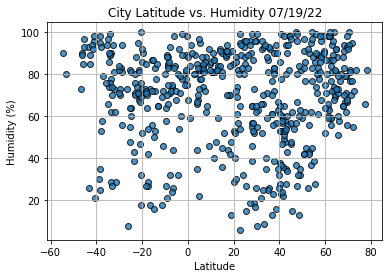

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

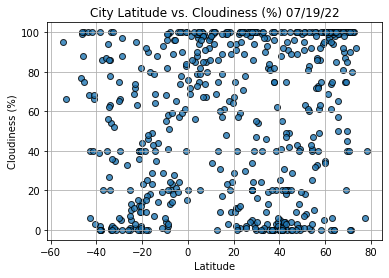

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

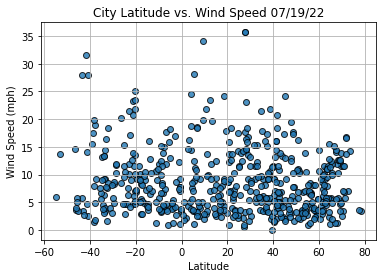

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


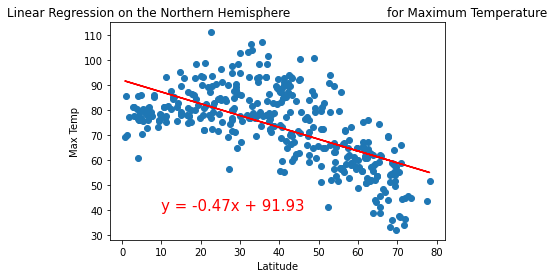

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

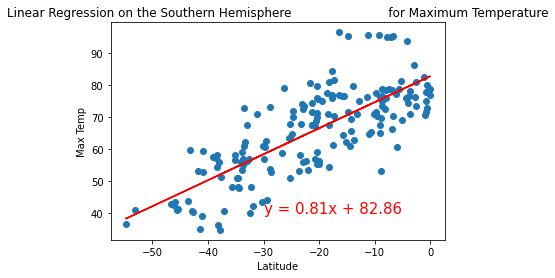

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-30,40))

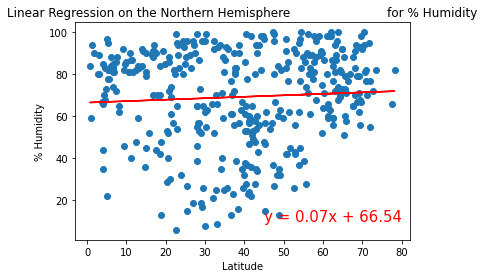

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

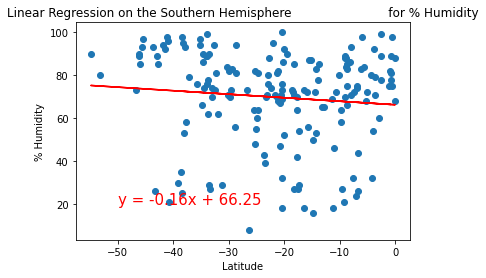

In [24]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,20))

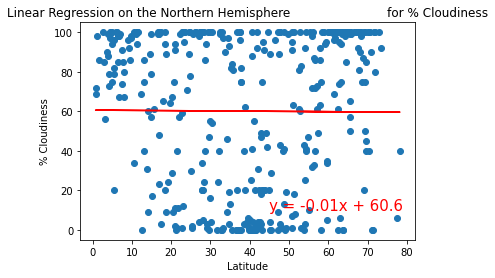

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(45,10))

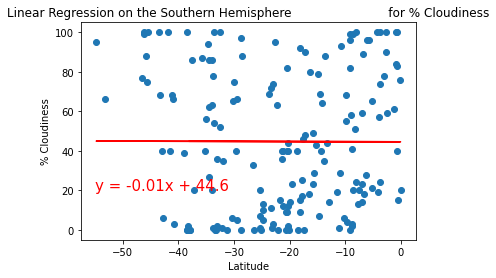

In [26]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,20))

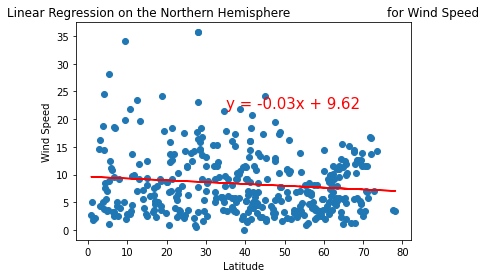

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(35,22))

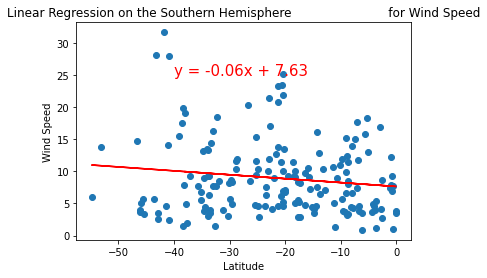

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-40,25))